# Stock Market Analysis Project

We'll be analyzing stock data related to a few car companies, from Jan 1 2012 to Jan 1 2023. Keep in mind that this project is mainly just to practice your skills with matplotlib, pandas, and numpy. Don't infer financial trading advice from the analysis we do here!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime

____
## Part 1: Getting the Data

### Tesla Stock (Ticker: TSLA on the NASDAQ)




In [3]:
msft = yf.Ticker("MSFT")

# get all stock info (slow)
# msft.info
# # fast access to subset of stock info (opportunistic)
# msft.fast_info

# get historical market data
hist = msft.history(period="1mo")

In [4]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-21,254.479996,255.490005,251.589996,252.669998,28397400,0,0
2023-02-22,254.089996,254.339996,250.339996,251.509995,22491100,0,0
2023-02-23,255.559998,256.839996,250.479996,254.770004,29219100,0,0
2023-02-24,249.960007,251.000000,248.100006,249.220001,24990900,0,0
2023-02-27,252.460007,252.820007,249.389999,250.160004,21190000,0,0
2023-02-28,249.070007,251.490005,248.729996,249.419998,22491000,0,0
2023-03-01,250.759995,250.929993,245.789993,246.270004,27565300,0,0
2023-03-02,246.550003,251.399994,245.610001,251.110001,24808200,0,0
2023-03-03,252.190002,255.619995,251.389999,255.289993,30741300,0,0


In [14]:
stocks_list = ['TSLA', 'GM', 'F']

In [15]:
stocks = yf.download(stocks_list, start='2019-01-01', end='2023-01-01')

[*********************100%***********************]  3 of 3 completed


In [16]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2019-01-02 to 2022-12-30
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, F)     1008 non-null   float64
 1   (Adj Close, GM)    1008 non-null   float64
 2   (Adj Close, TSLA)  1008 non-null   float64
 3   (Close, F)         1008 non-null   float64
 4   (Close, GM)        1008 non-null   float64
 5   (Close, TSLA)      1008 non-null   float64
 6   (High, F)          1008 non-null   float64
 7   (High, GM)         1008 non-null   float64
 8   (High, TSLA)       1008 non-null   float64
 9   (Low, F)           1008 non-null   float64
 10  (Low, GM)          1008 non-null   float64
 11  (Low, TSLA)        1008 non-null   float64
 12  (Open, F)          1008 non-null   float64
 13  (Open, GM)         1008 non-null   float64
 14  (Open, TSLA)       1008 non-null   float64
 15  (Volume, F)        1008 non-null   int64  
 16  (Volum

In [17]:
stocks.head()

Adj Close                       Close                        High  \
                   F         GM       TSLA     F         GM       TSLA     F   
Date                                                                           
2019-01-02  6.602705  31.676300  20.674667  7.90  33.639999  20.674667  8.02   
2019-01-03  6.502411  30.367441  20.024000  7.78  32.250000  20.024000  7.99   
2019-01-04  6.753147  31.384399  21.179333  8.08  33.330002  21.179333  8.12   
2019-01-07  6.928662  32.354271  22.330667  8.29  34.360001  22.330667  8.37   
2019-01-08  6.995524  32.778004  22.356667  8.37  34.810001  22.356667  8.54   

                                   Low                        Open             \
                   GM       TSLA     F         GM       TSLA     F         GM   
Date                                                                            
2019-01-02  33.810001  21.008667  7.48  32.410000  19.920000  7.53  32.849998   
2019-01-03  33.680000  20.626667  7.78  32.200001  19.825333  7.97  33.340000   
2019-01-04  33.570000  21.200001  7.85  32.430000  20.181999  7.91  32.799999   
2019-01-07  34.970001  22.449333  8.03  33.480000  21.183332  8.11  33.709999   
2019-01-08  35.680000  22.934000  8.35  34.490002  21.801332  8.42  35.000000   

                         Volume                       
                 TSLA         F        GM       TSLA  
Date                                                  
2019-01-02  20.406668  47494400   7662300  174879000  
2019-01-03  20.466667  39172400  11618300  104478000  
2019-01-04  20.400000  43039800  10784000  110911500  
2019-01-07  21.448000  40729400  10722300  113268000  
2019-01-08  22.797333  45644000  10532900  105127500

## Part 2: Visualizing the Data

** Time to visualize the data. **

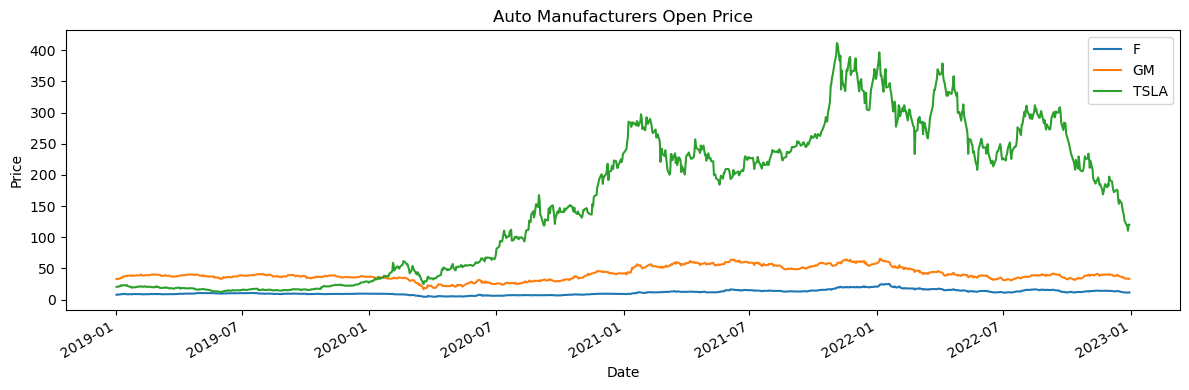

In [21]:
stocks['Open'].plot(figsize=(12, 4))
plt.title('Auto Manufacturers Open Price')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

____

** Plot the Volume of stock traded each day.**

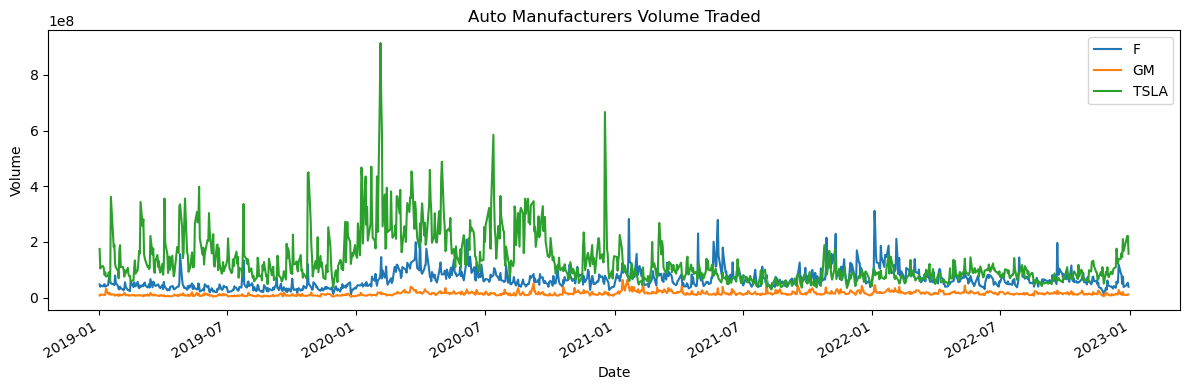

In [22]:
stocks['Volume'].plot(figsize=(12, 4))
plt.title('Auto Manufacturers Volume Traded')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

* TSLA High volume specially during pandemic times
* Ford higher volume than the other at the beginning of 2022.

____

** The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each)**

** Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

<AxesSubplot:xlabel='Date'>

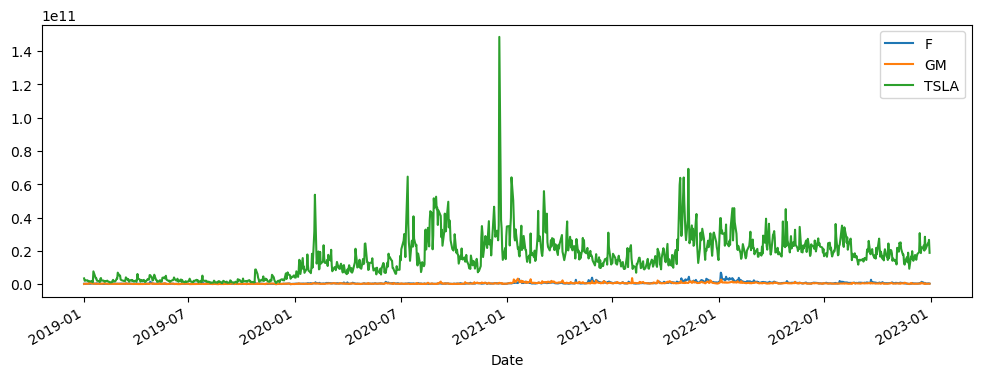

In [25]:
(stocks['Open'] * stocks['Volume']).plot(figsize=(12, 4))

____

** Let's practice plotting out some MA (Moving Averages). Plot out the MA50 and MA200 for GM. **

In [32]:
stocks['Open']['GM']

Date
2019-01-02    32.849998
2019-01-03    33.340000
2019-01-04    32.799999
2019-01-07    33.709999
2019-01-08    35.000000
                ...    
2022-12-23    33.680000
2022-12-27    33.520000
2022-12-28    33.320000
2022-12-29    32.820000
2022-12-30    33.330002
Name: GM, Length: 1008, dtype: float64

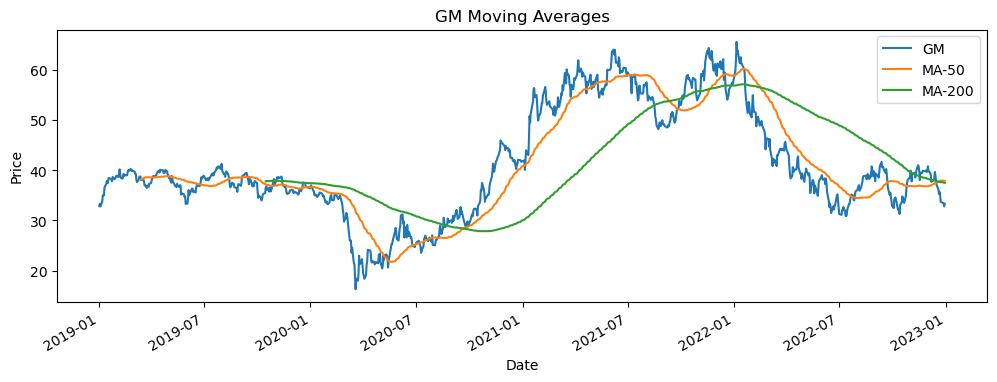

In [38]:
stocks['Open']['GM'].plot(figsize=(12,4))
stocks['Open']['GM'].rolling(50).mean().plot(label='MA-50')
stocks['Open']['GM'].rolling(200).mean().plot(label='MA-200')
plt.title('GM Moving Averages')
plt.ylabel('Price')
plt.legend()
plt.show()

______

** Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot. Import scatter_matrix from pandas.plotting and use it to create a scatter matrix plot of all the stocks'opening price. You may need to rearrange the columns into a new single dataframe. Hints and info can be found here: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot **

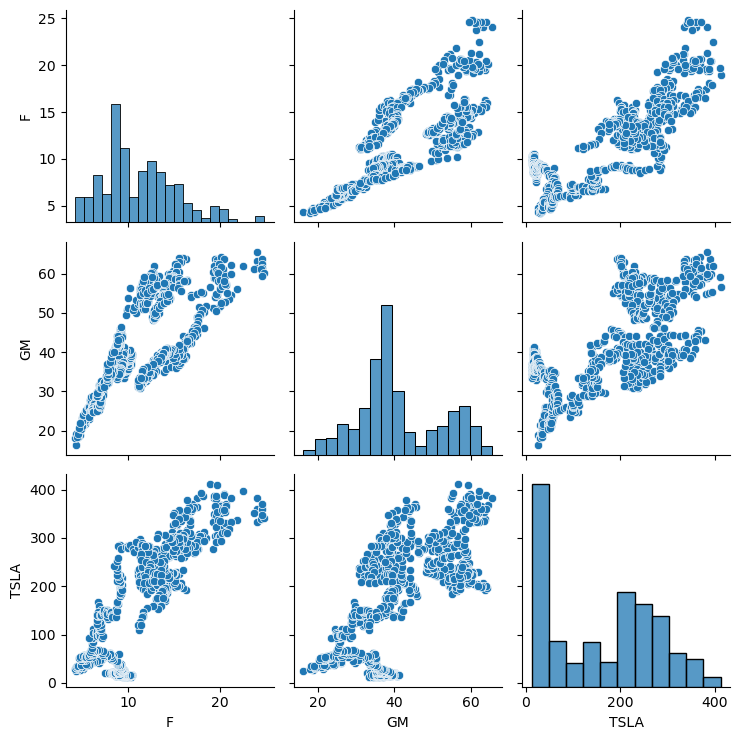

In [44]:
sns.pairplot(stocks['Open'])
plt.tight_layout()
plt.show()

_____
### Bonus Visualization Task! (Note: This is hard!)
**Let's now create a candlestick chart! Watch the video if you get stuck on trying to recreate this visualization, there are quite a few steps involved!Refer to the video to understand how to interpret and read this chart. Hints: https://matplotlib.org/examples/pylab_examples/finance_demo.html**

** Create a CandleStick chart for Ford in January 2012 (too many dates won't look good for a candlestick chart)**

In [45]:
import mplfinance as mpf


In [54]:
ford_open = stocks['Open']['F'].to_frame()
ford_open.r

In [57]:
mpf.plot(stocks['Open'], type='candle')

ValueError: Column "Open" NOT FOUND in Input DataFrame!
            CHECK that your column names are correct AND/OR
            CHECK for leading or trailing blanks in your column names.

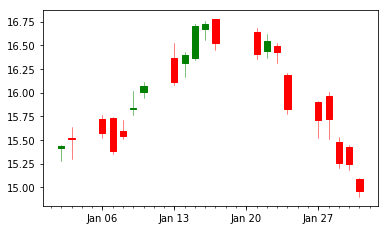

____
# Part 3: Basic Financial Analysis

Now it is time to focus on a few key financial calculations. This will serve as your transition to the second half of the course. All you need to do is follow along with the instructions, this will mainly be an exercise in converting a mathematical equation or concept into code using python and pandas, something we will do often when working with quantiative data! If you feel very lost in this section, don't worry! Just go to the solutions lecture and treat it as a code-along lecture, use whatever style of learning works best for you!

Let's begin!
____

## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

** Create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or you can also use pandas' built in pct_change method. **

,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


,Open,High,Low,Close,Volume,Total Traded,mpl_time,returns
Date,,,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,NaN,NaN
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,NaN,0.015274
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,NaN,0.025664
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,NaN,0.010354
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,NaN,0.007686


,Open,High,Low,Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08,NaN,NaN,NaN
2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08,NaN,NaN,0.004751
2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08,NaN,NaN,0.048227
2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08,NaN,NaN,0.033829
2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08,NaN,NaN,-0.003490


** Now plot a histogram of each companies returns. Either do them separately, or stack them on top of each other. Which stock is the most "volatile"? (as judged by the variance in the daily returns we will discuss volatility in a lot more detail in future lectures.)**

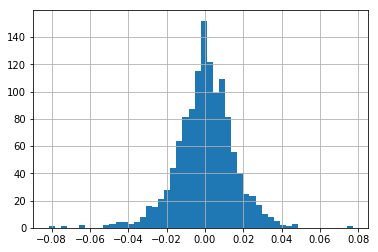

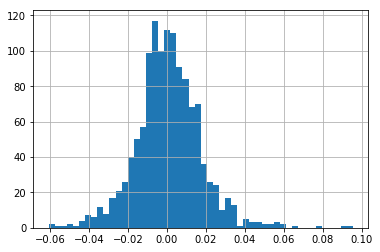

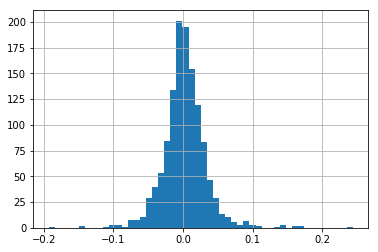

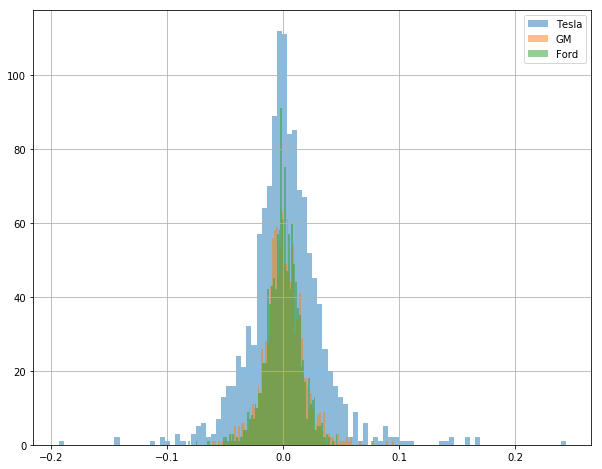

** Try also plotting a KDE instead of histograms for another view point. Which stock has the widest plot? **

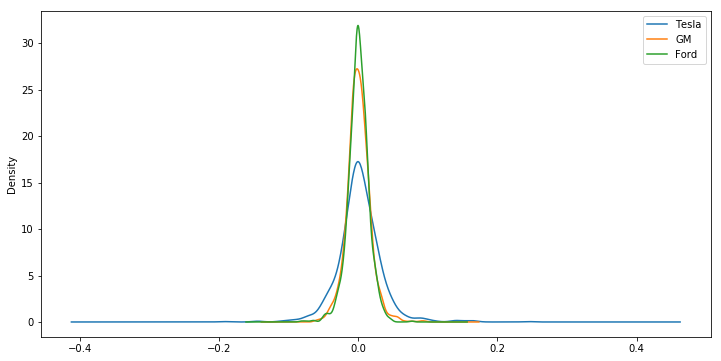

** Try also creating some box plots comparing the returns. **

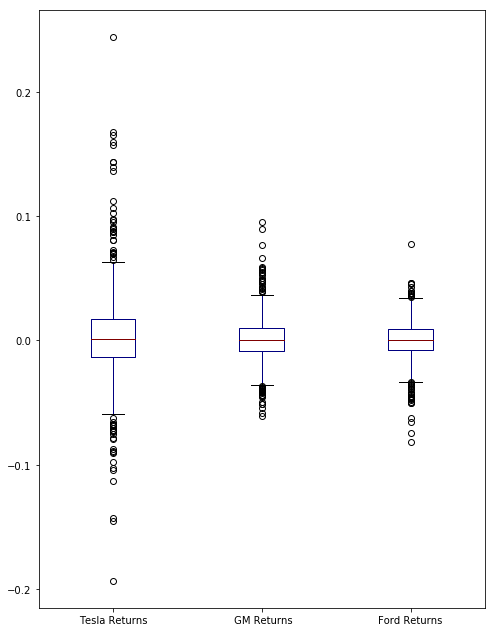

## Comparing Daily Returns between Stocks

** Create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?**

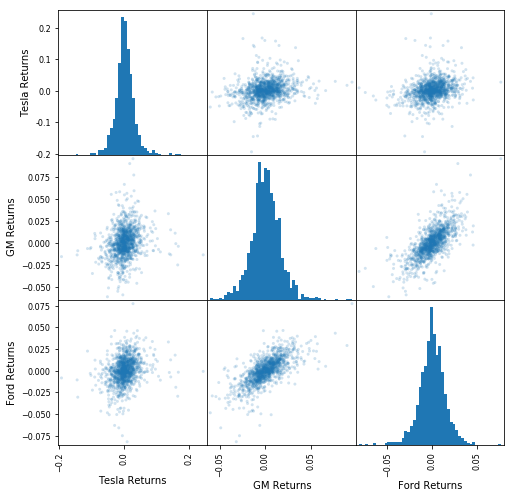

** It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely!**

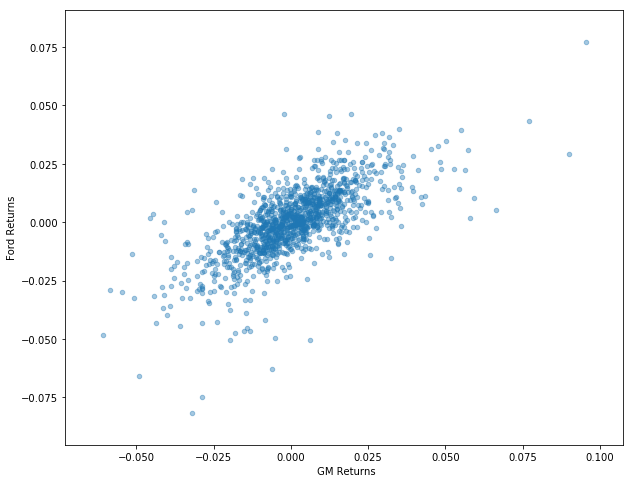

____
## Cumulative Daily Returns

Great! Now we can see which stock was the most wide ranging in daily returns (you should have realized it was Tesla, our original stock price plot should have also made that obvious).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

** Create a cumulative daily return column for each car company's dataframe.**

,Open,High,Low,Close,Volume,Total Traded,returns,Cumulative Return
Date,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177,0.986823
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292,0.965812
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481,0.957621
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388,0.970442


** Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**

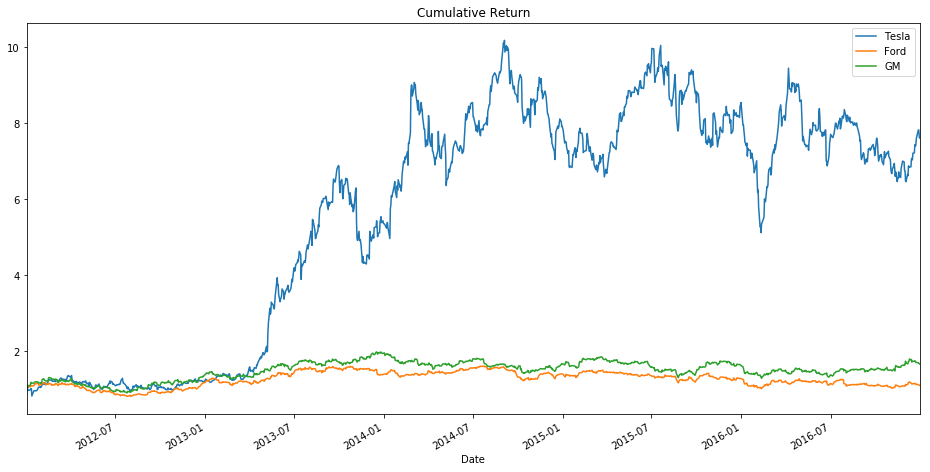

# Great Job!

That is it for thsi very basic analysis, this concludes this half of the course, which focuses much more on learning the tools of the trade. The second half of the course is where we really dive into functionality designed for time series, quantitative analysis, algorithmic trading, and much more!